In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline    
from sklearn.model_selection import train_test_split
from numpy import mean
from numpy import std

# **Datasets Reading** 

In [2]:
# x_train = pd.read_csv('../Datasets/X_Train Without Yeo Johnson 70-30.csv')

# x_test = pd.read_csv('../Datasets/X_Test Without Yeo Johnson 70-30.csv')

# y_train = pd.read_csv('../Datasets/Y_Train Without Yeo Johnson 70-30.csv')

# y_test = pd.read_csv('../Datasets/Y_Test Without Yeo Johnson  70-30.csv')

In [3]:
x_train = pd.read_csv('../Updated Datasets/Update X_Train Without Yeo Johnson 70-30.csv')

x_test = pd.read_csv('../Updated Datasets/Update X_Test Without Yeo Johnson 70-30.csv')

y_train = pd.read_csv('../Updated Datasets/Update Y_Train Without Yeo Johnson 70-30.csv')

y_test = pd.read_csv('../Updated Datasets/Update Y_Test Without Yeo Johnson 70-30.csv')

In [4]:
x_train

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
0,0.896617,0.032034,-0.054052,-0.128564,-0.720501,-0.816991,-0.855640,-0.480919,-0.473748,-0.451293,-1.114137
1,0.896617,-1.966008,2.181869,1.504902,0.461613,0.264700,-0.855640,1.386073,1.596949,-0.141839,-1.114137
2,0.896617,0.531544,-0.721925,-0.496462,-0.072245,-0.044354,-0.769694,0.219203,0.250996,-0.451293,0.657481
3,-1.115304,1.930174,2.559363,2.358425,1.376799,0.496491,1.464903,0.452577,-0.266678,0.291397,1.004102
4,0.896617,0.431642,-0.402507,0.106890,2.406382,3.119648,-0.769694,0.919325,-0.163143,0.477069,1.774371
...,...,...,...,...,...,...,...,...,...,...,...
179,-1.115304,0.032034,0.178251,0.077458,-1.101829,-0.121618,-0.769694,1.386073,1.596949,-0.018057,-0.921570
180,-1.115304,-0.567379,-0.489621,-0.746633,-0.987430,0.496491,-0.254017,-0.714293,1.079275,-0.203730,-0.343869
181,0.896617,0.831251,3.582000,4.342622,0.842941,1.500918,0.691389,-0.247545,1.804019,0.043833,1.196669
182,-1.115304,0.531544,0.265365,1.254732,0.042153,-0.507936,0.175713,-0.480919,-0.577283,-0.141839,1.196669


In [5]:
print(y_train['Class'].value_counts())

2    91
0    64
1    29
Name: Class, dtype: int64


In [6]:
# # Define the range values for each feature
# range_values = {
#     'HbA1c': [(-2.8, -1), (-1, -0.5), (-0.5, 1), (1, 2.9)],
#     'Chol': [(-3.08, 1), (1, 3.09)]
# }

# # Iterate over the range values and check the data within the specified range
# for feature, ranges in range_values.items():
#     # print(f"Values within the range for {feature}:")
#     for range_min, range_max in ranges:
#         subset = x_train[(x_train[feature] >= range_min) & (x_train[feature] < range_max)]
#         print(f"Range {range_min}-{range_max}: {subset}")
#     print()


In [7]:
# !pip install mlxtend

# Forward Feature Selection
## Sequential Feature Selection using Logistic Regression

In [8]:
# #importing the necessary libraries
# from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# from sklearn.linear_model import LogisticRegression
# # Sequential Forward Selection(sfs)
# sfs = SFS(LogisticRegression(),
#           k_features=9,
#           forward=True,
#           floating=False,
#           scoring = 'r2',
#           cv = 0)

# sfs.fit(x_train, y_train)
# sfs.k_feature_names_     # to get the final set of features

In [9]:
SFS_Top_4_X = x_train[['Gender', 'Urea', 'Cr', 'HbA1c', 'TG']]
SFS_Top_5_X = x_train[['Gender', 'Urea', 'Cr', 'HbA1c', 'TG']]
SFS_Top_7_X = x_train[['Gender', 'Urea', 'Cr', 'HbA1c', 'TG', 'HDL', 'LDL']]
SFS_Top_9_X = x_train[['Gender', 'Urea', 'Cr', 'HbA1c', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']]
x_train = SFS_Top_4_X

In [10]:
SFS_Top_4_X = x_test[['Gender', 'Urea', 'Cr', 'HbA1c', 'TG']]
SFS_Top_5_X = x_test[['Gender', 'Urea', 'Cr', 'HbA1c', 'TG']]
SFS_Top_7_X = x_test[['Gender', 'Urea', 'Cr', 'HbA1c', 'TG', 'HDL', 'LDL']]
SFS_Top_9_X = x_test[['Gender', 'Urea', 'Cr', 'HbA1c', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']]
x_test = SFS_Top_4_X

In [11]:
metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "Cohen Kappa", "AUC"]

performance_dict = {}
performance_dict['Metrics'] = metrics

In [12]:
metrics_grid = ["Accuracy", "Precision", "Recall", "F1 Score", "Cohen Kappa", "AUC"]

performance_dict_grid = {}
performance_dict_grid['Metrics'] = metrics_grid

# SMOTETomek Balancing

In [13]:

# from collections import Counter
# from imblearn.combine import SMOTETomek
# counter = Counter(y_train)
# print('Before', counter)
# smtt = SMOTETomek(random_state = 139)
# x_train_smt, y_train_smt = smtt.fit_resample(x_train, y_train)
# counter = Counter(y_train_smt)
# print('After', counter)


In [14]:

# from collections import Counter
# from imblearn.combine import SMOTETomek
# counter = Counter(y_test)
# print('Before', counter)
# smtt = SMOTETomek(random_state = 139)
# x_test_smt, y_test_smt = smtt.fit_resample(x_test, y_test)
# counter = Counter(y_test_smt)
# print('After', counter)


# Support Vector Classifier Train, Test 

In [15]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
modelSVC = SVC(probability=True)
modelSVC.fit(x_train, y_train)
#modelSVC.fit(x_test, y_test)
#print(modelSVC.score(x_test, y_test))

y_pred_svc = modelSVC.predict(x_test)
#y_pred = modelSVC.predict(x_train)
svc_acc = accuracy_score(y_test, y_pred_svc)
#ac = accuracy_score(y_train, y_pred)
print(svc_acc)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(confusion_matrix(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))

0.9125
[[29  2  1]
 [ 0  7  4]
 [ 0  0 37]]
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        32
           1       0.78      0.64      0.70        11
           2       0.88      1.00      0.94        37

    accuracy                           0.91        80
   macro avg       0.89      0.85      0.86        80
weighted avg       0.91      0.91      0.91        80



C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
from sklearn.metrics import cohen_kappa_score, f1_score, precision_score, recall_score, roc_auc_score

cmSVC = confusion_matrix(y_test, modelSVC.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmSVC[1,1]  
TN = cmSVC[0,0] 
FP = cmSVC[0,1] 
FN = cmSVC[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
totalSVC=sum(sum(cmSVC))
Accuracy = (TN+TP)/totalSVC
# MCC
val = (TP * TN) - (FP * FN)
MCC_SVC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))



Y_pred_svc = modelSVC.predict(x_test)


cohen_score = cohen_kappa_score(y_test, Y_pred_svc)
f1 = f1_score(y_test, Y_pred_svc, average = "weighted")
precision = precision_score(y_test, Y_pred_svc, average = "weighted")
recall = recall_score(y_test, Y_pred_svc, average = "weighted")

pred_prob = modelSVC.predict_proba(x_test)
auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))
print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")

Precision  0.9143849206349206
f1 Score  0.9098057169537249
Recall  0.9125
Specificity/TNR: 0.9354838709677419
Cohen Kappa: 0.8533647551715109
AUC Score  0.9665242839298073


In [17]:
svc_performances = [svc_acc, precision, recall, f1, cohen_score, auc_score ]
performance_dict['SVC'] = svc_performances

performance_dict

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.9125,
  0.9143849206349206,
  0.9125,
  0.9098057169537249,
  0.8533647551715109,
  0.9665242839298073]}

# Supper Vector Classifier Hyperparameter Tuning GridSearchCV

In [18]:
from sklearn.model_selection import GridSearchCV
GSCV_SVC = GridSearchCV(modelSVC,{
    'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel':['rbf', 'linear', 'poly', 'sigmoid']
}, 
cv = 10, 
return_train_score = False
)
GSCV_SVC.fit(x_train, y_train)
GSCV_SVC.cv_results_

C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

{'mean_fit_time': array([0.01575561, 0.00837402, 0.01546147, 0.01326077, 0.01137111,
        0.00807855, 0.00967324, 0.01066999, 0.01329088, 0.00799236,
        0.01057596, 0.01355782, 0.01565211, 0.00857174, 0.01026676,
        0.01347032, 0.01695065, 0.0090744 , 0.01067142, 0.01386247,
        0.01854959, 0.01635549, 0.02862506, 0.01246979, 0.01246829,
        0.00887132, 0.01163716, 0.011765  , 0.01555777, 0.0103714 ,
        0.01091135, 0.01276391, 0.01586044, 0.00927453, 0.0095768 ,
        0.01366272, 0.01575706, 0.01047056, 0.0102716 , 0.014959  ,
        0.0271265 , 0.0145606 , 0.02581322, 0.01037173, 0.0112695 ,
        0.00937409, 0.01141043, 0.00957355, 0.011868  , 0.01096697,
        0.01565685, 0.014361  , 0.02134171, 0.01276557, 0.01057076,
        0.01625524, 0.01695058, 0.01356311, 0.01156726, 0.01655517,
        0.02193985, 0.0125644 , 0.03410778, 0.01416006, 0.01366253,
        0.00986991, 0.0106729 , 0.00937195, 0.01336081, 0.01336186,
        0.01047027, 0.01416099,

In [19]:
df_svc_grid = pd.DataFrame(GSCV_SVC.cv_results_)
df_svc_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.015756,0.002177,0.002097,0.000832,1,1,rbf,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}",0.947368,0.894737,...,0.894737,0.722222,0.722222,0.833333,0.777778,0.833333,0.888889,0.846199,0.079220,151
1,0.008374,0.001681,0.001699,0.000640,1,1,linear,"{'C': 1, 'gamma': 1, 'kernel': 'linear'}",0.894737,0.894737,...,0.947368,0.722222,0.944444,0.944444,0.888889,1.000000,0.888889,0.912573,0.075180,81
2,0.015461,0.002697,0.001892,0.000528,1,1,poly,"{'C': 1, 'gamma': 1, 'kernel': 'poly'}",0.894737,0.789474,...,0.947368,0.722222,0.777778,0.944444,0.777778,0.777778,0.833333,0.841228,0.080641,153
3,0.013261,0.002048,0.002200,0.000601,1,1,sigmoid,"{'C': 1, 'gamma': 1, 'kernel': 'sigmoid'}",0.578947,0.684211,...,0.736842,0.666667,0.666667,0.555556,0.555556,0.555556,0.666667,0.650877,0.088459,276
4,0.011371,0.000911,0.001894,0.000537,1,0.1,rbf,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.842105,0.842105,...,0.789474,0.722222,0.666667,0.777778,0.666667,0.833333,0.722222,0.770468,0.067799,232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.013202,0.001507,0.001795,0.000869,20,0.001,sigmoid,"{'C': 20, 'gamma': 0.001, 'kernel': 'sigmoid'}",0.789474,0.842105,...,0.789474,0.722222,0.666667,0.722222,0.722222,0.833333,0.722222,0.765205,0.058946,244
396,0.015959,0.001840,0.002193,0.000597,20,0.0001,rbf,"{'C': 20, 'gamma': 0.0001, 'kernel': 'rbf'}",0.473684,0.473684,...,0.473684,0.555556,0.444444,0.500000,0.555556,0.500000,0.500000,0.495029,0.034325,295
397,0.025925,0.007545,0.002297,0.001191,20,0.0001,linear,"{'C': 20, 'gamma': 0.0001, 'kernel': 'linear'}",0.947368,0.894737,...,0.947368,0.777778,0.944444,0.944444,0.944444,1.000000,0.833333,0.923392,0.066597,36
398,0.010966,0.003091,0.002393,0.000655,20,0.0001,poly,"{'C': 20, 'gamma': 0.0001, 'kernel': 'poly'}",0.473684,0.473684,...,0.473684,0.555556,0.500000,0.500000,0.500000,0.500000,0.500000,0.495029,0.023684,295


In [20]:
df_svc_grid[['param_C', 'param_kernel', 'mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.846199
1,1,linear,0.912573
2,1,poly,0.841228
3,1,sigmoid,0.650877
4,1,rbf,0.770468
...,...,...,...
395,20,sigmoid,0.765205
396,20,rbf,0.495029
397,20,linear,0.923392
398,20,poly,0.495029


In [21]:
print(GSCV_SVC.best_score_)
gscv_svc_acc = GSCV_SVC.best_score_
print(GSCV_SVC.best_params_)

0.9342105263157896
{'C': 10, 'gamma': 1, 'kernel': 'linear'}


In [22]:
grid_predictions = GSCV_SVC.predict(x_test)

# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        32
           1       1.00      0.82      0.90        11
           2       0.92      0.97      0.95        37

    accuracy                           0.95        80
   macro avg       0.96      0.92      0.94        80
weighted avg       0.95      0.95      0.95        80



In [23]:
from sklearn.metrics import cohen_kappa_score, f1_score, precision_score, recall_score, roc_auc_score

cmSVC = confusion_matrix(y_test, GSCV_SVC.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmSVC[1,1]  
TN = cmSVC[0,0] 
FP = cmSVC[0,1] 
FN = cmSVC[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
totalSVC=sum(sum(cmSVC))
Accuracy = (TN+TP)/totalSVC
# MCC
val = (TP * TN) - (FP * FN)
MCC_SVC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))



y_pred_svc_grid = GSCV_SVC.predict(x_test)


cohen_score = cohen_kappa_score(y_test, y_pred_svc_grid)
f1 = f1_score(y_test, y_pred_svc_grid, average = "weighted")
precision = precision_score(y_test, y_pred_svc_grid, average = "weighted")
recall = recall_score(y_test, y_pred_svc_grid, average = "weighted")

pred_prob = GSCV_SVC.predict_proba(x_test)
auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))
print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")

Precision  0.951923076923077
f1 Score  0.9494078947368422
Recall  0.95
Specificity/TNR: 1.0
Cohen Kappa: 0.9165362545644236
AUC Score  0.995863216244441


In [24]:
svc_performances_grid = [gscv_svc_acc, precision, recall, f1, cohen_score, auc_score ]
performance_dict_grid['SVC'] = svc_performances_grid

performance_dict_grid

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.9342105263157896,
  0.951923076923077,
  0.95,
  0.9494078947368422,
  0.9165362545644236,
  0.995863216244441]}

# Logistic Regression Train, Test

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

modelLR = LogisticRegression()
modelLR.fit(x_train, y_train)

y_pred_lr = modelLR.predict(x_test)
lr_ac = accuracy_score(y_test, y_pred_lr)

print("Training Accuracy: {:.3f}".format(modelLR.score(x_train, y_train)))
print("Testing Accuracy: {:.3f}".format(modelLR.score(x_test, y_test)))

print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Training Accuracy: 0.848
Testing Accuracy: 0.875
[[31  0  1]
 [ 1  2  8]
 [ 0  0 37]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        32
           1       1.00      0.18      0.31        11
           2       0.80      1.00      0.89        37

    accuracy                           0.88        80
   macro avg       0.92      0.72      0.72        80
weighted avg       0.90      0.88      0.84        80



C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
from sklearn.metrics import cohen_kappa_score
cmRFC = confusion_matrix(y_test, modelLR.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmRFC[1,1]  
TN = cmRFC[0,0] 
FP = cmRFC[0,1] 
FN = cmRFC[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
# Accuracy
totalRFC=sum(sum(cmRFC))
Accuracy = (TN+TP)/totalRFC
# MCC
val = (TP * TN) - (FP * FN)
MCC_RFC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
# Cohen Kappa
Y_pred_lr = modelLR.predict(x_test)
pred_prob = modelLR.predict_proba(x_test)


cohen_score = cohen_kappa_score(y_test, Y_pred_lr)
f1 = f1_score(y_test, Y_pred_lr, average = "weighted")
precision = precision_score(y_test, Y_pred_lr, average = "weighted")
recall = recall_score(y_test, Y_pred_lr, average = "weighted")


auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))

print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")

Precision  0.8970108695652174
f1 Score  0.8421570898980537
Recall  0.875
Specificity/TNR: 1.0
Cohen Kappa: 0.7809419496166484
AUC Score  0.9829180838130851


In [27]:
rfc_performances = [lr_ac, precision, recall, f1, cohen_score, auc_score ]
performance_dict['LR'] = rfc_performances

performance_dict

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.9125,
  0.9143849206349206,
  0.9125,
  0.9098057169537249,
  0.8533647551715109,
  0.9665242839298073],
 'LR': [0.875,
  0.8970108695652174,
  0.875,
  0.8421570898980537,
  0.7809419496166484,
  0.9829180838130851]}

# Logistic Regression Hyperparameter Tuning GridSearchCV

In [28]:
from sklearn import linear_model

C = np.logspace(0, 4, 10)
penalty = ['l1', 'l2']
solver = ['liblinear', 'saga']
hyperparameters = dict(C=C, penalty=penalty, solver=solver)
logistic = linear_model.LogisticRegression()
GSCV_LR = GridSearchCV(logistic, hyperparameters, cv = 10)
GSCV_LR.fit(x_train, y_train)
GSCV_LR.cv_results_

C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

{'mean_fit_time': array([0.00448768, 0.01695495, 0.0041887 , 0.01735344, 0.00698013,
        0.02114277, 0.01156852, 0.01406186, 0.00538373, 0.01595688,
        0.00418859, 0.01356254, 0.00448759, 0.0150589 , 0.00398962,
        0.0101723 , 0.00338929, 0.01017387, 0.00298138, 0.01027205,
        0.00369008, 0.01056876, 0.00309138, 0.00917544, 0.00314462,
        0.01057003, 0.00327997, 0.00997636, 0.00338209, 0.01046972,
        0.00309334, 0.01007528, 0.00318646, 0.01117673, 0.00278339,
        0.00913913, 0.00361629, 0.01076217, 0.00348322, 0.00887036]),
 'std_fit_time': array([0.00128149, 0.00330832, 0.00182852, 0.00275656, 0.00227404,
        0.0028835 , 0.01714274, 0.00180896, 0.00142412, 0.00356843,
        0.00097674, 0.00303203, 0.00135629, 0.00283697, 0.00077331,
        0.00277819, 0.00066158, 0.00086886, 0.00063399, 0.00204745,
        0.00063853, 0.00168189, 0.00053502, 0.00116389, 0.00032866,
        0.00160869, 0.0009022 , 0.00189071, 0.00091419, 0.0016923 ,
        0.000

In [29]:
df_lr_grid = pd.DataFrame(GSCV_SVC.cv_results_)
df_lr_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.015756,0.002177,0.002097,0.000832,1,1,rbf,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}",0.947368,0.894737,...,0.894737,0.722222,0.722222,0.833333,0.777778,0.833333,0.888889,0.846199,0.079220,151
1,0.008374,0.001681,0.001699,0.000640,1,1,linear,"{'C': 1, 'gamma': 1, 'kernel': 'linear'}",0.894737,0.894737,...,0.947368,0.722222,0.944444,0.944444,0.888889,1.000000,0.888889,0.912573,0.075180,81
2,0.015461,0.002697,0.001892,0.000528,1,1,poly,"{'C': 1, 'gamma': 1, 'kernel': 'poly'}",0.894737,0.789474,...,0.947368,0.722222,0.777778,0.944444,0.777778,0.777778,0.833333,0.841228,0.080641,153
3,0.013261,0.002048,0.002200,0.000601,1,1,sigmoid,"{'C': 1, 'gamma': 1, 'kernel': 'sigmoid'}",0.578947,0.684211,...,0.736842,0.666667,0.666667,0.555556,0.555556,0.555556,0.666667,0.650877,0.088459,276
4,0.011371,0.000911,0.001894,0.000537,1,0.1,rbf,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.842105,0.842105,...,0.789474,0.722222,0.666667,0.777778,0.666667,0.833333,0.722222,0.770468,0.067799,232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.013202,0.001507,0.001795,0.000869,20,0.001,sigmoid,"{'C': 20, 'gamma': 0.001, 'kernel': 'sigmoid'}",0.789474,0.842105,...,0.789474,0.722222,0.666667,0.722222,0.722222,0.833333,0.722222,0.765205,0.058946,244
396,0.015959,0.001840,0.002193,0.000597,20,0.0001,rbf,"{'C': 20, 'gamma': 0.0001, 'kernel': 'rbf'}",0.473684,0.473684,...,0.473684,0.555556,0.444444,0.500000,0.555556,0.500000,0.500000,0.495029,0.034325,295
397,0.025925,0.007545,0.002297,0.001191,20,0.0001,linear,"{'C': 20, 'gamma': 0.0001, 'kernel': 'linear'}",0.947368,0.894737,...,0.947368,0.777778,0.944444,0.944444,0.944444,1.000000,0.833333,0.923392,0.066597,36
398,0.010966,0.003091,0.002393,0.000655,20,0.0001,poly,"{'C': 20, 'gamma': 0.0001, 'kernel': 'poly'}",0.473684,0.473684,...,0.473684,0.555556,0.500000,0.500000,0.500000,0.500000,0.500000,0.495029,0.023684,295


In [30]:
df_lr_grid[['param_C', 'param_kernel', 'mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.846199
1,1,linear,0.912573
2,1,poly,0.841228
3,1,sigmoid,0.650877
4,1,rbf,0.770468
...,...,...,...
395,20,sigmoid,0.765205
396,20,rbf,0.495029
397,20,linear,0.923392
398,20,poly,0.495029


In [31]:
print(GSCV_LR.best_score_)
gscv_lr_acc = GSCV_LR.best_score_
print(GSCV_LR.best_params_)

0.8736842105263157
{'C': 1.0, 'penalty': 'l1', 'solver': 'saga'}


In [32]:
grid_predictions = GSCV_LR.predict(x_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        32
           1       1.00      0.64      0.78        11
           2       0.88      1.00      0.94        37

    accuracy                           0.94        80
   macro avg       0.96      0.87      0.90        80
weighted avg       0.94      0.94      0.93        80



In [33]:
from sklearn.metrics import cohen_kappa_score
cmRFC = confusion_matrix(y_test, GSCV_LR.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmRFC[1,1]  
TN = cmRFC[0,0] 
FP = cmRFC[0,1] 
FN = cmRFC[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
# Accuracy
totalRFC=sum(sum(cmRFC))
Accuracy = (TN+TP)/totalRFC
# MCC
val = (TP * TN) - (FP * FN)
MCC_RFC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
# Cohen Kappa
Y_pred_lr_grid = GSCV_LR.predict(x_test)
pred_prob = GSCV_LR.predict_proba(x_test)


cohen_score = cohen_kappa_score(y_test, Y_pred_lr_grid)
f1 = f1_score(y_test, Y_pred_lr_grid, average = "weighted")
precision = precision_score(y_test, Y_pred_lr_grid, average = "weighted")
recall = recall_score(y_test, Y_pred_lr_grid, average = "weighted")


auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))

print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")

Precision  0.9449404761904763
f1 Score  0.9338230861965038
Recall  0.9375
Specificity/TNR: 1.0
Cohen Kappa: 0.894095843261848
AUC Score  0.9918984340689504


In [34]:
lr_performances_grid = [gscv_lr_acc, precision, recall, f1, cohen_score, auc_score ]
performance_dict_grid['LR'] = lr_performances_grid

performance_dict_grid

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.9342105263157896,
  0.951923076923077,
  0.95,
  0.9494078947368422,
  0.9165362545644236,
  0.995863216244441],
 'LR': [0.8736842105263157,
  0.9449404761904763,
  0.9375,
  0.9338230861965038,
  0.894095843261848,
  0.9918984340689504]}

# KNN Train, Test

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


modelKNN = KNeighborsClassifier() #, algorithm = 'ball_tree', weights = 'distance', metric = 'minkowski', p = 2
modelKNN.fit(x_train, y_train)
print(modelKNN.score(x_test, y_test))

# Predicting the Test set results
y_pred_knn = modelKNN.predict(x_test)
ac = accuracy_score(y_test, y_pred_knn)
print(accuracy_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

0.9
0.9
[[29  2  1]
 [ 1  8  2]
 [ 0  2 35]]
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        32
           1       0.67      0.73      0.70        11
           2       0.92      0.95      0.93        37

    accuracy                           0.90        80
   macro avg       0.85      0.86      0.85        80
weighted avg       0.90      0.90      0.90        80



C:\Users\babar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [36]:
from sklearn.metrics import cohen_kappa_score
cmKNN = confusion_matrix(y_test, modelKNN.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmKNN[1,1]  
TN = cmKNN[0,0] 
FP = cmKNN[0,1] 
FN = cmKNN[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
# Accuracy
totalKNN = sum(sum(cmKNN))
Accuracy = (TN+TP)/totalKNN
# MCC
val = (TP * TN) - (FP * FN)
MCC_KNN = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
# Cohen Kappa
Y_pred_knn = modelKNN.predict(x_test)
pred_prob = modelKNN.predict_proba(x_test)


cohen_score = cohen_kappa_score(y_test, Y_pred_knn)
f1 = f1_score(y_test, Y_pred_knn, average = "weighted")
precision = precision_score(y_test, Y_pred_knn, average = "weighted")
recall = recall_score(y_test, Y_pred_knn, average = "weighted")


auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))

print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")


Precision  0.9043201754385966
f1 Score  0.9015123889668069
Recall  0.9
Specificity/TNR: 0.9354838709677419
Cohen Kappa: 0.8359815479241415
AUC Score  0.9545851854963016


In [37]:
# metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "Specificity", "Cohen Kappa", "AUC"]
knn_performances = [ac, precision, recall, f1, cohen_score, auc_score ]
performance_dict['KNN'] = knn_performances

performance_dict

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.9125,
  0.9143849206349206,
  0.9125,
  0.9098057169537249,
  0.8533647551715109,
  0.9665242839298073],
 'LR': [0.875,
  0.8970108695652174,
  0.875,
  0.8421570898980537,
  0.7809419496166484,
  0.9829180838130851],
 'KNN': [0.9,
  0.9043201754385966,
  0.9,
  0.9015123889668069,
  0.8359815479241415,
  0.9545851854963016]}

# Logistic Regression Hyperparameter Tuning GridSearchCV

In [38]:
grid_params = { 'n_neighbors' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

GSCV_KNN = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv = 10, n_jobs = -1)
GSCV_KNN.fit(x_train, y_train)
GSCV_KNN.cv_results_

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


C:\Users\babar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


{'mean_fit_time': array([0.01077058, 0.01037109, 0.00837693, 0.00937514, 0.01017356,
        0.00877681, 0.0069802 , 0.00817807, 0.00957303, 0.00688162,
        0.00668192, 0.00867701, 0.00747921, 0.00827806, 0.00847671,
        0.00787888, 0.00648358, 0.00937445, 0.00827832, 0.01356378,
        0.01087027, 0.0080785 , 0.00957446, 0.00827796, 0.01535842,
        0.01336319, 0.01436169, 0.01645603, 0.01017282, 0.00678203,
        0.00628362, 0.01007316, 0.00728171, 0.01156819, 0.01137097,
        0.0063827 , 0.00708148, 0.00687923, 0.00697999, 0.01057184,
        0.01186743, 0.00807846, 0.00957563, 0.00877655, 0.0115694 ,
        0.01286669, 0.00987377, 0.00877609, 0.00977435, 0.01366475,
        0.00907559, 0.00897593, 0.00887823, 0.00638351, 0.00787826,
        0.00638199, 0.00628302, 0.00747869, 0.0072808 , 0.00688205,
        0.00568411, 0.00628328, 0.00738034, 0.0060838 , 0.00857732,
        0.00807815, 0.00658278, 0.00578427, 0.00847638, 0.00767953,
        0.01166816, 0.00817757,

In [39]:
df_lr_grid = pd.DataFrame(GSCV_KNN.cv_results_)
df_lr_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.010771,0.005514,0.007681,0.002525,minkowski,1,uniform,"{'metric': 'minkowski', 'n_neighbors': 1, 'wei...",0.947368,0.789474,...,0.789474,0.833333,0.722222,0.777778,0.833333,0.777778,0.555556,0.797368,0.106113,52
1,0.010371,0.005871,0.004488,0.000919,minkowski,1,distance,"{'metric': 'minkowski', 'n_neighbors': 1, 'wei...",0.947368,0.789474,...,0.789474,0.833333,0.722222,0.777778,0.833333,0.777778,0.555556,0.797368,0.106113,52
2,0.008377,0.002150,0.006980,0.003596,minkowski,2,uniform,"{'metric': 'minkowski', 'n_neighbors': 2, 'wei...",0.894737,0.842105,...,0.842105,0.666667,0.777778,0.722222,0.666667,0.833333,0.611111,0.775146,0.097061,78
3,0.009375,0.008605,0.005685,0.003123,minkowski,2,distance,"{'metric': 'minkowski', 'n_neighbors': 2, 'wei...",0.947368,0.789474,...,0.789474,0.833333,0.722222,0.777778,0.833333,0.777778,0.555556,0.797368,0.106113,52
4,0.010174,0.005794,0.010072,0.011428,minkowski,3,uniform,"{'metric': 'minkowski', 'n_neighbors': 3, 'wei...",0.947368,0.736842,...,0.842105,0.666667,0.722222,0.722222,0.666667,0.833333,0.666667,0.759357,0.088099,104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.009674,0.005553,0.004588,0.001424,manhattan,18,distance,"{'metric': 'manhattan', 'n_neighbors': 18, 'we...",1.000000,0.894737,...,0.947368,0.722222,0.722222,0.833333,0.722222,0.944444,0.833333,0.861988,0.106537,4
116,0.010671,0.010714,0.008080,0.002618,manhattan,19,uniform,"{'metric': 'manhattan', 'n_neighbors': 19, 'we...",0.789474,0.894737,...,0.947368,0.722222,0.666667,0.777778,0.722222,0.777778,0.833333,0.802632,0.084667,50
117,0.007180,0.002555,0.006284,0.003279,manhattan,19,distance,"{'metric': 'manhattan', 'n_neighbors': 19, 'we...",1.000000,0.894737,...,0.947368,0.722222,0.722222,0.833333,0.833333,0.888889,0.777778,0.861988,0.097459,3
118,0.007678,0.003123,0.007482,0.003286,manhattan,20,uniform,"{'metric': 'manhattan', 'n_neighbors': 20, 'we...",0.789474,0.842105,...,0.894737,0.722222,0.666667,0.777778,0.666667,0.777778,0.833333,0.786550,0.078567,66


In [40]:
df_lr_grid[['param_metric', 'param_n_neighbors', 'mean_test_score']]

,param_metric,param_n_neighbors,mean_test_score
0,minkowski,1,0.797368
1,minkowski,1,0.797368
2,minkowski,2,0.775146
3,minkowski,2,0.797368
4,minkowski,3,0.759357
...,...,...,...
115,manhattan,18,0.861988
116,manhattan,19,0.802632
117,manhattan,19,0.861988
118,manhattan,20,0.786550


In [41]:
print(GSCV_KNN.best_score_)
gscv_knn_acc = GSCV_KNN.best_score_
print(GSCV_KNN.best_params_)

0.867543859649123
{'metric': 'manhattan', 'n_neighbors': 20, 'weights': 'distance'}


In [42]:
grid_predictions = GSCV_KNN.predict(x_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        32
           1       0.90      0.82      0.86        11
           2       0.92      0.97      0.95        37

    accuracy                           0.94        80
   macro avg       0.93      0.91      0.92        80
weighted avg       0.94      0.94      0.94        80



In [43]:
from sklearn.metrics import cohen_kappa_score
cmRFC = confusion_matrix(y_test, GSCV_KNN.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmRFC[1,1]  
TN = cmRFC[0,0] 
FP = cmRFC[0,1] 
FN = cmRFC[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
# Accuracy
totalRFC=sum(sum(cmRFC))
Accuracy = (TN+TP)/totalRFC
# MCC
val = (TP * TN) - (FP * FN)
MCC_RFC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
# Cohen Kappa
Y_pred_knn_grid = GSCV_KNN.predict(x_test)
pred_prob = GSCV_KNN.predict_proba(x_test)


cohen_score = cohen_kappa_score(y_test, Y_pred_knn_grid)
f1 = f1_score(y_test, Y_pred_knn_grid, average = "weighted")
precision = precision_score(y_test, Y_pred_knn_grid, average = "weighted")
recall = recall_score(y_test, Y_pred_knn_grid, average = "weighted")


auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))

print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")

Precision  0.9377698511166253
f1 Score  0.9369674185463659
Recall  0.9375
Specificity/TNR: 0.967741935483871
Cohen Kappa: 0.8962386511024644
AUC Score  0.9868903680400457


In [44]:
knn_performances_grid = [gscv_knn_acc, precision, recall, f1, cohen_score, auc_score ]
performance_dict_grid['KNN'] = knn_performances_grid

performance_dict_grid

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.9342105263157896,
  0.951923076923077,
  0.95,
  0.9494078947368422,
  0.9165362545644236,
  0.995863216244441],
 'LR': [0.8736842105263157,
  0.9449404761904763,
  0.9375,
  0.9338230861965038,
  0.894095843261848,
  0.9918984340689504],
 'KNN': [0.867543859649123,
  0.9377698511166253,
  0.9375,
  0.9369674185463659,
  0.8962386511024644,
  0.9868903680400457]}

# Result of all classifiers

In [45]:
performance_df = pd.DataFrame.from_dict(performance_dict)
performance_df


,Metrics,SVC,LR,KNN
0,Accuracy,0.912500,0.875000,0.900000
1,Precision,0.914385,0.897011,0.904320
2,Recall,0.912500,0.875000,0.900000
3,F1 Score,0.909806,0.842157,0.901512
4,Cohen Kappa,0.853365,0.780942,0.835982
5,AUC,0.966524,0.982918,0.954585


# Result of all classifiers after hyperparameter tuning 

In [46]:
performance_df_grid = pd.DataFrame.from_dict(performance_dict_grid)
performance_df_grid

,Metrics,SVC,LR,KNN
0,Accuracy,0.934211,0.873684,0.867544
1,Precision,0.951923,0.944940,0.937770
2,Recall,0.950000,0.937500,0.937500
3,F1 Score,0.949408,0.933823,0.936967
4,Cohen Kappa,0.916536,0.894096,0.896239
5,AUC,0.995863,0.991898,0.986890


# Extracting Result

In [47]:
performance_df = performance_df.transpose()
performance_df.to_csv("../Final CSV Without YJ/Without Yeo Johnson 70-30 Applying SFS Top 4 features.csv")

performance_df_grid = performance_df_grid.transpose()
performance_df_grid.to_csv("../Final CSV Without YJ/Without Yeo Johnson 70-30 Applying Hyperparameter SFS Top 4 features.csv")

# ROC Curve

In [48]:
from sklearn.metrics import roc_curve

# predict probabilities
pred_prob1 = modelSVC.predict_proba(x_test)
pred_prob5 = modelLR.predict_proba(x_test)
pred_prob7 = modelKNN.predict_proba(x_test)

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label = 1)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob5[:,1], pos_label = 1)
fpr7, tpr7, thresh7 = roc_curve(y_test, pred_prob7[:,1], pos_label = 1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

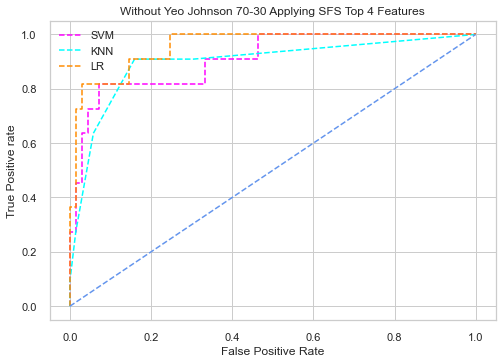

In [49]:
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
sb.set_theme(style = 'whitegrid')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle = '--', color = 'magenta', label = 'SVM')
plt.plot(fpr7, tpr7, linestyle = '--', color = 'cyan', label = 'KNN')
plt.plot(fpr5, tpr5, linestyle = '--', color = 'darkorange', label = 'LR')
plt.plot(p_fpr, p_tpr, linestyle = '--', color = 'cornflowerblue')
# title
plt.title('Without Yeo Johnson 70-30 Applying SFS Top 4 Features')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig("../Final ROC Without YJ/Without Yeo Johnson 70-30 Applying SFS Top 4 Features.png", dpi=300)

plt.show();